# Medical Cost Prediction

The aim of this code is to predict medical cost for patients. I am using insurance dataset from kaggle for this analysis

In [1]:
#Importing reuqired libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Dataset:
df = pd.read_csv('Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data preprocessing

In [38]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Checking
print(df.smoker.value_counts(),'\n',df.sex.value_counts(),'\n',df.region.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64 
 male      676
female    662
Name: sex, dtype: int64 
 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [3]:
#Mapping values to categorical columns
df['sex']= df['sex'].map({'male':1 , 'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southeast':0 , 'northwest':1,'southwest':2,'northeast':3})

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
# checking Null values :
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis:

Text(0.5, 1.0, 'Age Distribution')

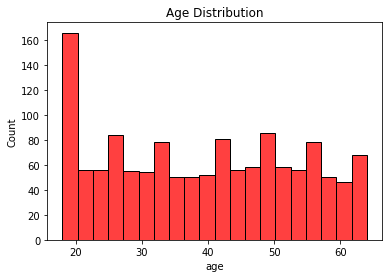

In [13]:
#Age distribution:
sns.histplot(df.age , bins= 20,kde = False , color = 'red')
plt.title('Age Distribution')

Text(0.5, 1.0, 'Gender distribution')

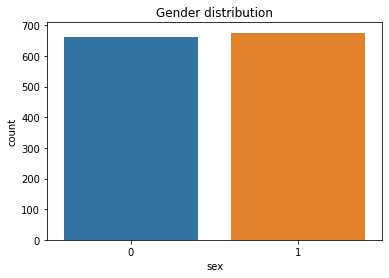

In [15]:
#Gender :
sns.countplot(data = df , x = 'sex')
plt.title('Gender distribution')

Text(0.5, 1.0, 'BMI Distribution')

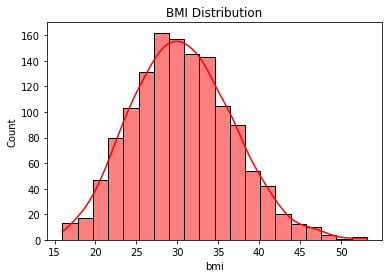

In [17]:
#Bmi distribution:
sns.histplot(df.bmi , bins= 20,kde = True , color = 'red')
plt.title('BMI Distribution')

Text(0.5, 1.0, 'Child count')

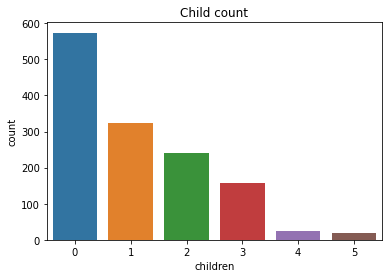

In [20]:
#Child count:
sns.countplot(data = df ,  x = 'children')
plt.title('Child count')

Text(0.5, 1.0, 'Smoker count')

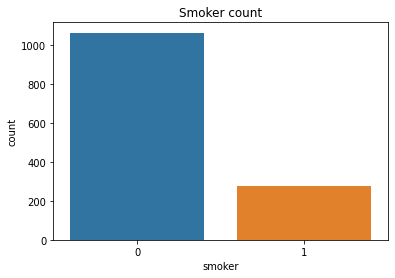

In [21]:
#Smoker :
sns.countplot(data = df , x = 'smoker')
plt.title('Smoker count')

<AxesSubplot:xlabel='smoker', ylabel='count'>

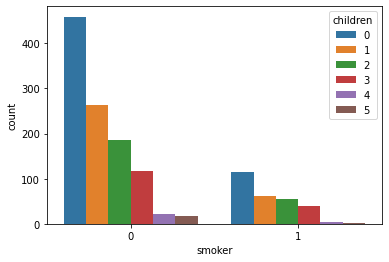

In [22]:
#Smokers who has children :
sns.countplot(data = df , x = 'smoker' , hue = 'children')

In [23]:
#Checking correlation :
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.010265,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.010170,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.213489,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.000107,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.010265,-0.010170,-0.213489,0.000107,-0.038873,1.000000,-0.040728
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.040728,1.000000


<AxesSubplot:>

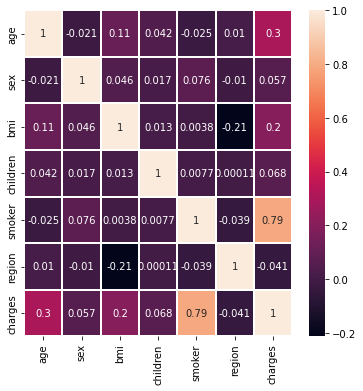

In [27]:
# Plotting corelation:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot = True ,  linewidths = 2)

<AxesSubplot:xlabel='smoker', ylabel='count'>

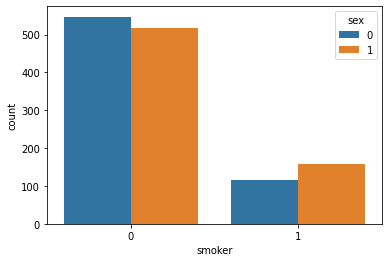

In [28]:
# Checking smoker count with gender:
sns.countplot(data = df , x = 'smoker' , hue = 'sex')

Text(0.5, 1.0, 'Medical Charges')

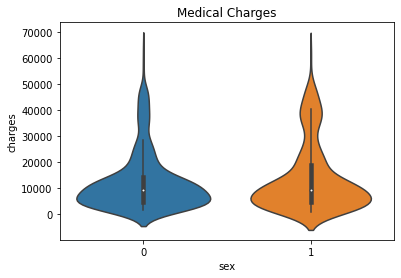

In [31]:
#Checking amount differnce of both gender :
sns.violinplot(data = df , x = 'sex' , y = 'charges')
plt.title('Medical Charges')

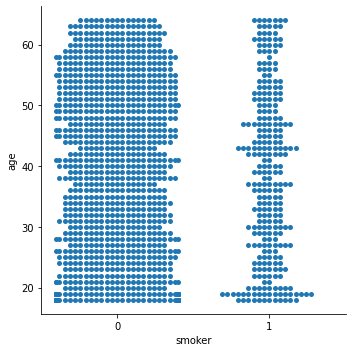

In [32]:
#Smokers and age distribution:
sns.catplot(x='smoker', y='age',kind='swarm',data=df)

### Training data:

In [5]:
X = df.drop('charges',axis= 1)

In [6]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [7]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=(0.3))

### Model building

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [11]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [12]:
# Creeating Models 
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
knn = KNeighborsRegressor()

In [13]:
# Fitting data
lr_model.fit(X_train , y_train)
dt_model.fit(X_train , y_train)
rf_model.fit(X_train , y_train)
knn.fit(X_train , y_train)

KNeighborsRegressor()

In [14]:
#Checking Score
print("Linear regression" , lr_model.score(X_train , y_train))
print("Decision tree" , dt_model.score(X_train , y_train))
print('Random forest', rf_model.score(X_train , y_train))
print('KNN',knn.score(X_train , y_train))

Linear regression 0.7604449893400217
Decision tree 1.0
Random forest 0.9784932594546131
KNN 0.410887194306387


In [15]:
# predicting values :
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
kn_pred = knn.predict(X_test)

Text(0.5, 1.0, 'Linear Regression')

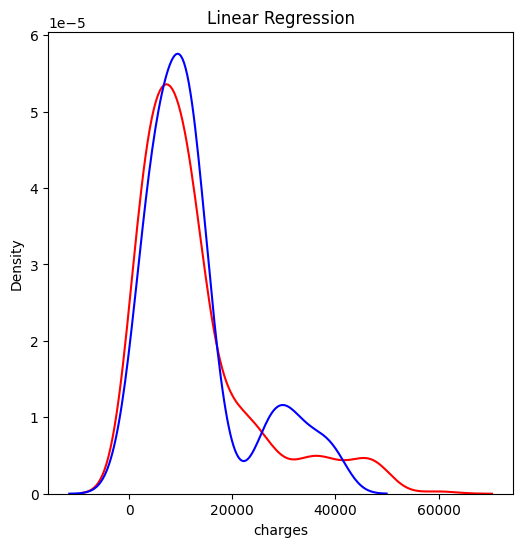

In [16]:
#Checking Accuracy : Linear Regression
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test , hist = False , color = 'r',label = 'Actual value')
sns.distplot(lr_pred , hist = False , color = 'b',label = 'Predicted value' , ax = ax1)
plt.title('Linear Regression')

In [113]:
print("MAE:" , mean_absolute_error(y_test , lr_pred))
print("MSE:" , mean_squared_error(y_test , lr_pred))
print("RMSE:" , np.sqrt(mean_squared_error(y_test , lr_pred)))
print("r2:" , r2_score(y_test , lr_pred))

MAE: 4379.14684003483
MSE: 42007204.92718879
RMSE: 6481.296546771239
r2: 0.6934134013572126


Text(0.5, 1.0, 'Decision Tree')

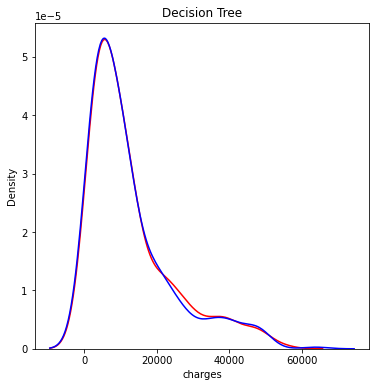

In [114]:
# decision Tree :
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test , hist = False , color = 'r',label = 'Actual value')
sns.distplot(dt_pred , hist = False , color = 'b',label = 'Predicted value' , ax = ax1)
plt.title('Decision Tree')

In [115]:
print("MAE:" , mean_absolute_error(y_test , dt_pred))
print("MSE:" , mean_squared_error(y_test , dt_pred))
print("RMSE:" , np.sqrt(mean_squared_error(y_test , dt_pred)))
print("r2:" , r2_score(y_test , dt_pred))

MAE: 2923.0058024502487
MSE: 41135313.276221834
RMSE: 6413.681725516307
r2: 0.6997768405843245


Text(0.5, 1.0, 'Random Forest')

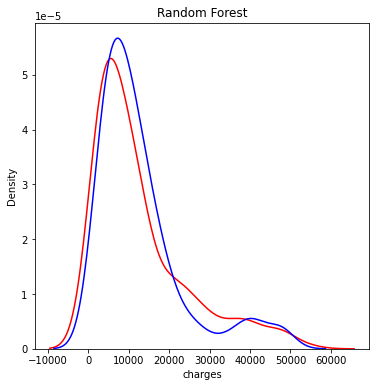

In [116]:
# Random Forest :
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test , hist = False , color = 'r',label = 'Actual value')
sns.distplot(rf_pred , hist = False , color = 'b',label = 'Predicted value' , ax = ax1)
plt.title('Random Forest')

In [117]:
print("MAE:" , mean_absolute_error(y_test , rf_pred))
print("MSE:" , mean_squared_error(y_test , rf_pred))
print("RMSE:" , np.sqrt(mean_squared_error(y_test , rf_pred)))
print("r2:" , r2_score(y_test , rf_pred))

MAE: 2812.4380134230205
MSE: 27556551.37624427
RMSE: 5249.433433833052
r2: 0.7988804689240403


Text(0.5, 1.0, 'K Nearest Neighbors')

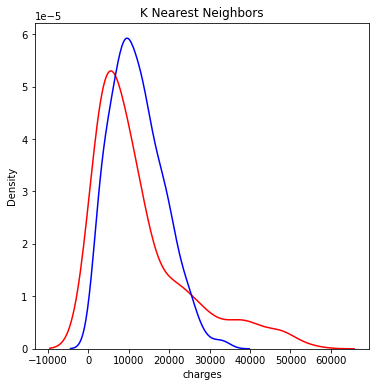

In [118]:
#SVM:
plt.figure(figsize=(6,6))
ax1 = sns.distplot(y_test , hist = False , color = 'r',label = 'Actual value')
sns.distplot(kn_pred , hist = False , color = 'b',label = 'Predicted value' , ax = ax1)
plt.title('K Nearest Neighbors')

In [119]:
print("MAE:" , mean_absolute_error(y_test , kn_pred))
print("MSE:" , mean_squared_error(y_test , kn_pred))
print("RMSE:" , np.sqrt(mean_squared_error(y_test , kn_pred)))
print("r2:" , r2_score(y_test , kn_pred))

MAE: 8079.764396660696
MSE: 129062471.2808869
RMSE: 11360.566503519396
r2: 0.058046729102202876


From above observations we can see that decision Tree and Random forest algorithm are giving best results  I have chosen Random forest model for further process.

  Moreover patients who smokes are more likly to get higher medical expenses than the pateint who don't smoke , Similiary Pateints with Higher BMI than 30 will get higher expenses than patients with BMI less than 30 and age is also the another which effects medical expenses.

In [120]:
# Dumping the model :
import pickle

In [121]:
pickle.dump(rf_model,open('model.pkl','wb'))